In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer    
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn import preprocessing
from scipy.sparse import hstack
import pandas_profiling

In [2]:
# Load dataset
df = pd.read_csv("/content/MoviesOnStreamingPlatforms_updated.csv")
df=df.iloc[:,1:] # removing in unnamed index column

In [4]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [6]:
df.Type.unique()

array([0])

In [7]:
#Finding Missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(df.ID))*100
miss

,miss_count,miss_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,9390,56.079790
IMDb,571,3.410177
Rotten Tomatoes,11586,69.194935
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


In [8]:
# Dropping values with missing % more than 50%
df.drop(['Rotten Tomatoes', 'Age'], axis = 1, inplace=True)
# Dropping Na's from the following columns
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 'Language', 'Runtime'],inplace=True)
df.reset_index(inplace=True,drop=True)
# Converting into object type
df.Year = df.Year.astype("object")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15233 entries, 0 to 15232
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15233 non-null  int64  
 1   Title        15233 non-null  object 
 2   Year         15233 non-null  object 
 3   IMDb         15233 non-null  float64
 4   Netflix      15233 non-null  int64  
 5   Hulu         15233 non-null  int64  
 6   Prime Video  15233 non-null  int64  
 7   Disney+      15233 non-null  int64  
 8   Type         15233 non-null  int64  
 9   Directors    15233 non-null  object 
 10  Genres       15233 non-null  object 
 11  Country      15233 non-null  object 
 12  Language     15233 non-null  object 
 13  Runtime      15233 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


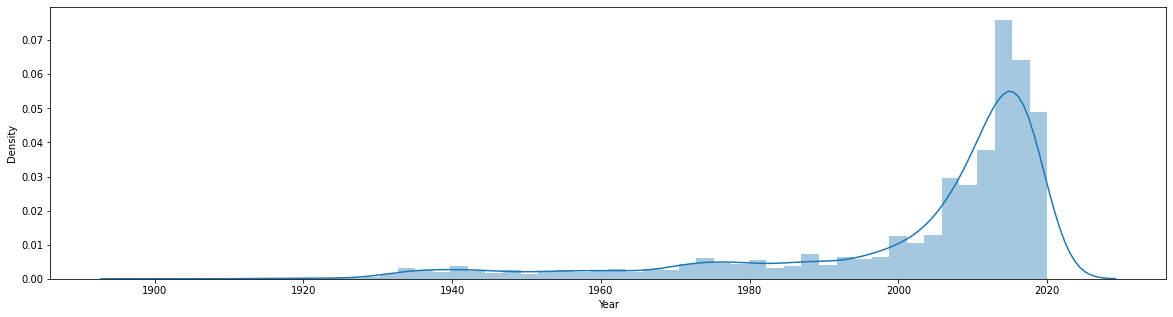

In [11]:
#checking Distribution of years
plt.figure(figsize=(20,5))
sns.distplot(df['Year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


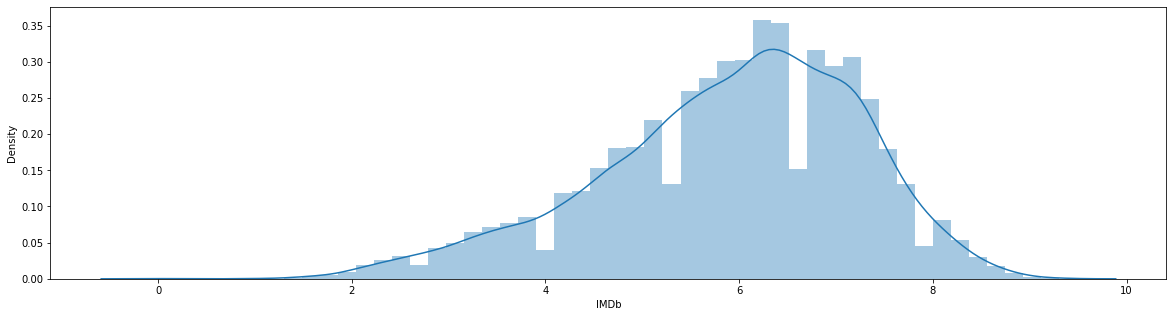

In [12]:
# Distribution of IMDb Rating
plt.figure(figsize=(20,5))
sns.distplot(df['IMDb'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


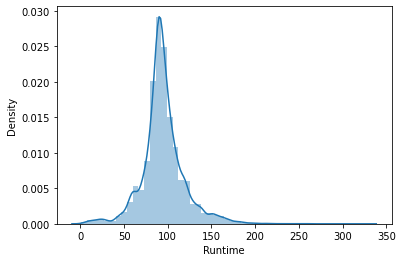

In [13]:
# Distribution of runtime
sns.distplot(df['Runtime'])
plt.show()

In [14]:
# A function to calculate the movies in different Streaming platforms
def m_cnt(plat, count=False):
    if count==False:
        print('Platform {} Count: {}'. format(plat, df[plat].sum()))
    else:
        return df[plat].sum()

In [15]:
# Let's see count of movies/shows of each streaming platform
m_cnt('Netflix')
m_cnt('Hulu')
m_cnt('Prime Video')
m_cnt('Disney+')

Platform Netflix Count: 3152
Platform Hulu Count: 848
Platform Prime Video Count: 11289
Platform Disney+ Count: 542


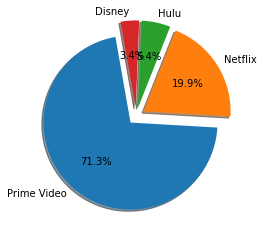

In [16]:
# Movies on each platform
lab = 'Prime Video','Netflix', 'Hulu', 'Disney'
s = [m_cnt('Prime Video', count=True),
     m_cnt('Netflix', count=True),
     m_cnt('Hulu', count=True),
     m_cnt('Disney+', count=True)]

explode = (0.1, 0.1, 0.1, 0.1)

#plotting
fig1, ax1 = plt.subplots()
ax1.pie(s,
       labels = lab,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 100)

ax1.axis = ('equal')
plt.show()

In [17]:
##split the genres by ',' & then stack it one after the other for easy analysis.
g = df['Genres'].str.split(',').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)
# Assign name to column
g.name = 'Genres'
# delete column
del df['Genres']
# join new column with the existing dataframe
df_genres = df.join(g)

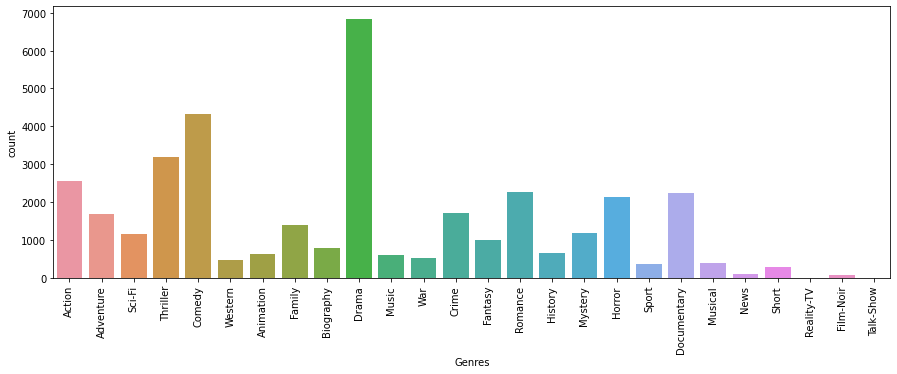

In [18]:
# Count of movies according to genre
plt.figure(figsize=(15,5))
sns.countplot(x='Genres', data=df_genres)
plt.xticks(rotation=90)
plt.show()

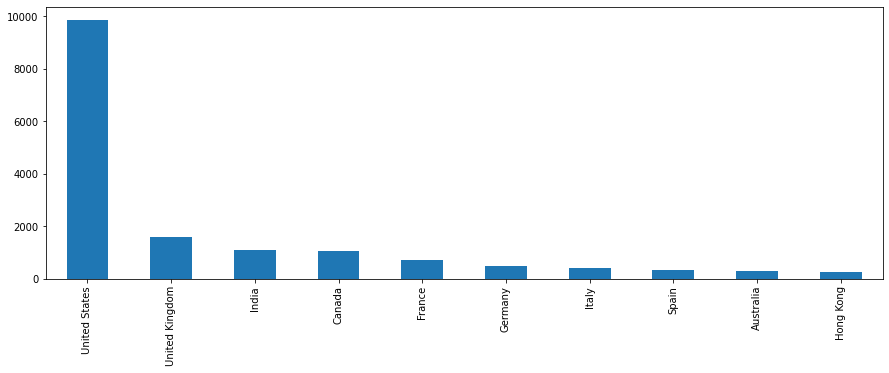

In [19]:
# Split the Country by ',' & then stack it one after the other for easy analysis.
c = df['Country'].str.split(',').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)
# Assign name to column
c.name = 'Country'
# delete column
del df['Country']
# join new column with the existing dataframe
df_country = df.join(c)
# plotting top 10 country and movie count
df_country['Country'].value_counts()[:10].plot(kind='bar',figsize=(15,5))
plt.show()

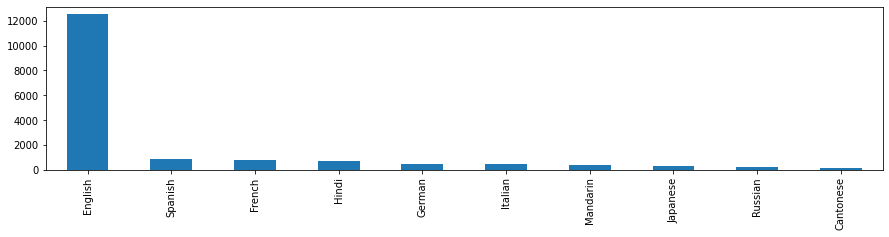

In [20]:
# perform stacking operation on language column
l = df['Language'].str.split(',').apply(pd.Series,1).stack()
l.index = l.index.droplevel(-1)
# Assign name to column
l.name = 'Language'
# delete column
del df['Language']
# join new column with the existing dataframe
df_language = df.join(l)
# plotting top 10 Language and movie count
df_language['Language'].value_counts()[:10].plot(kind='bar',figsize=(15,3))
plt.show()

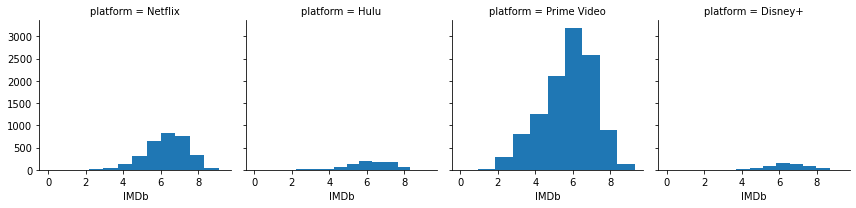

In [22]:
# melting platform columns to create visualization
df2 = pd.melt(df, id_vars=["ID","Title","Year","IMDb","Type","Runtime"], var_name="platform")
df2 = df2[df2.value==1]
df2.drop(columns=["value"],axis=1,inplace=True)
# Distribution of IMDB rating in different platform
g = sns.FacetGrid(df2, col = "platform")
g.map(plt.hist, "IMDb")
plt.show()

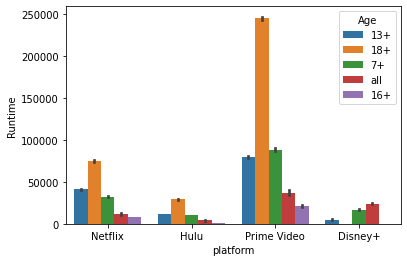

In [24]:
# Load dataset
df = pd.read_csv("/content/MoviesOnStreamingPlatforms_updated.csv")
df=df.iloc[:,1:]
df.ID = df.ID.astype("object")

# melting platform columns to create visualization
df2 = pd.melt(df, id_vars=["ID","Title","Year","Age","IMDb","Rotten Tomatoes","Type","Runtime"], var_name="platform")
df2 = df2[df2.value==1]
df2.drop(columns=["value"],axis=1,inplace=True)
# Total of runtime in different platform
ax = sns.barplot(x="platform", y="Runtime",hue="Age", estimator=sum, data=df2)

**Building a Recommender System**

In [26]:
df = pd.read_csv("/content/MoviesOnStreamingPlatforms_updated.csv")
df=df.iloc[:,1:]
#Finding Missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(df.ID))*100
miss
#Dropping values with missing % more than 50%
df.drop(['Rotten Tomatoes', 'Age'], axis = 1, inplace=True)
# Dropping Na's from the following columns
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 'Language', 'Runtime'],inplace=True)
df.reset_index(inplace=True,drop=True)
# converting into object type
df.ID = df.ID.astype("object")
df.Year = df.Year.astype("object")

I will build two recommender system based on cosine similarity.

1. Using only the numerical variable
2. Using both numerical and categorical variable

**Part One**

In [28]:
ndf = df.select_dtypes(include=['float64',"int64"])

# Scaling the numerical variable using a min-max scaler to reduce model complexity and training time.
#importing minmax scaler
from sklearn import preprocessing

# Create MinMaxScaler Object
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Create dataframe after transformation
ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))

# assign column names
ndfmx.columns=ndf.columns

# Show initial 5 records
ndfmx.head()

,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,0.946237,1.0,0.0,0.0,0.0,0.0,0.449541
1,0.935484,1.0,0.0,0.0,0.0,0.0,0.412844
2,0.913978,1.0,0.0,0.0,0.0,0.0,0.452599
3,0.913978,1.0,0.0,0.0,0.0,0.0,0.351682
4,0.946237,1.0,0.0,1.0,0.0,0.0,0.489297


In [30]:
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity
sig = cosine_similarity(ndfmx, ndfmx)

# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()
indices.head()


Title
Inception                         0
The Matrix                        1
Avengers: Infinity War            2
Back to the Future                3
The Good, the Bad and the Ugly    4
dtype: int64

In [31]:
# Writing a function to get recommendations based on the similarity score
def give_rec(title, sig=sig):

    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return df['Title'].iloc[movie_indices]

# Execute get_rec() function for getting recommendation
give_rec("The Matrix",sig = sig)

1269    Eh Janam Tumhare Lekhe
747          Khosla Ka Ghosla!
167                 Article 15
0                    Inception
2388                    Kaakan
1312     Merku Thodarchi Malai
742                      Udaan
57              A Silent Voice
606           Paan Singh Tomar
1528            Love Ni Bhavai
Name: Title, dtype: object

**Part Two**

In [32]:
# Using Numerical and Textual columns
df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [33]:
#the function performs all the important preprocessing steps
def preprocess(df):
    #combining all text columns
    # Selecting all object data type and storing them in list
    s = list(df.select_dtypes(include=['object']).columns)
    # Removing ID and Title column
    s.remove("Title")
    s.remove("ID")
    # Joining all text/object columns using commas into a single column
    df['all_text']= df[s].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

    # Creating a tokenizer to remove unwanted elements from our data like symbols and numbers
    token = RegexpTokenizer(r'[a-zA-Z]+')

    # Converting TfidfVector from the text
    cv = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
    text_counts= cv.fit_transform(df['all_text'])

    # Aelecting numerical variables
    ndf = df.select_dtypes(include=['float64',"int64"])

    # Scaling Numerical variables
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

    # Applying scaler on our data and converting i into a data frame
    ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))
    ndfmx.columns=ndf.columns    

    # Adding our adding numerical variables in the TF-IDF vector
    IMDb = ndfmx.IMDb.values[:, None]
    X_train_dtm = hstack((text_counts, IMDb))
    Netflix = ndfmx.Netflix.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Netflix))
    Hulu = ndfmx.Hulu.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Hulu))
    Prime = ndfmx["Prime Video"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Prime))
    Disney = ndfmx["Disney+"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Disney))
    Runtime = ndfmx.Runtime.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Runtime))
    return X_train_dtm

In [34]:
# Preprocessing data
mat =preprocess(df)
mat.shape

(15233, 11997)

In [35]:
# using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the sigmoid kernel
sig2 = cosine_similarity(mat, mat)

# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [36]:
give_rec("The Matrix",sig=sig2)

81             The Matrix Reloaded
245         The Matrix Revolutions
755              Jupiter Ascending
154                 Miss Americana
0                        Inception
3               Back to the Future
1971    The Girl Allergic to Wi-Fi
36                 Minority Report
2           Avengers: Infinity War
132        Solo: A Star Wars Story
Name: Title, dtype: object